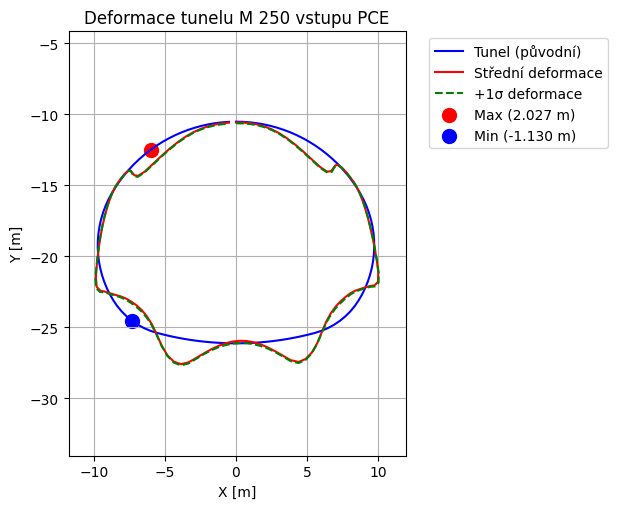

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "M.xlsx"  
df = pd.read_excel(file_path)

sm_cols = [col for col in df.columns if str(col).startswith("SM")]
other_cols = [col for col in df.columns if col not in sm_cols]

meanr = df[sm_cols].mean().values / 100000  # převedeno např. z mm na m
standartr = df[sm_cols].std().values / 100000

nodes = np.array([
    (0, -10.5275), (0.492, -10.5395), (0.983, -10.5755), (1.4719, -10.6353),
    (1.95708, -10.719), (2.43761, -10.8261), (2.91235, -10.9566), (3.38016, -11.1101),
    (3.83994, -11.2861), (4.29059, -11.4844), (4.73104, -11.7044), (5.16024, -11.9456),
    (5.57717, -12.2075), (6.00215, -12.505), (6.41129, -12.824), (6.80351, -13.1636),
    (7.17776, -13.5229), (7.53, -13.901), (7.87, -14.2968), (8.18, -14.7093),
    (8.48, -15.1374), (8.74685, -15.58), (8.97931, -16.0164), (9.18182, -16.4675),
    (9.35346, -16.9312), (9.49344, -17.4055), (9.60113, -17.8881), (9.67604, -18.3768),
    (9.71783, -18.8695), (9.7263, -19.3639), (9.70142, -19.8578), (9.64331, -20.3488),
    (9.55222, -20.8348), (9.42857, -21.3136), (9.27246, -21.7842), (9.08488, -22.2431),
    (8.86671, -22.6884), (8.61894, -23.1179), (8.34143, -23.5199), (8.02741, -23.8942),
    (7.67966, -24.2374), (7.30124, -24.5464), (6.89548, -24.8185), (6.46599, -25.0513),
    (6.01653, -25.2428), (5.55109, -25.3913), (5.07787, -25.5123), (4.60202, -25.6225),
    (4.12377, -25.7219), (3.6434, -25.8104), (3.16338, -25.8875), (2.68174, -25.9538),
    (2.19873, -26.0091), (1.71458, -26.0534), (1.22955, -26.0868), (0.744, -26.1092),
    (0.258, -26.1205), (-0.228, -26.1209), (-0.714, -26.1102), (-1.20007, -26.0885),
    (-1.68514, -26.0558), (-2.16935, -26.0121), (-2.65244, -25.9574), (-3.13417, -25.8919),
    (-3.61429, -25.8154), (-4.10204, -25.7262), (-4.58759, -25.6257), (-5.07, -25.5141),
    (-5.55, -25.3913), (-6.01653, -25.2428), (-6.47, -25.0513), (-6.90, -24.8185),
    (-7.30124, -24.5464), (-7.67966, -24.2374), (-8.02741, -23.8942), (-8.34143, -23.5199),
    (-8.61894, -23.1179), (-8.86671, -22.6884), (-9.08488, -22.2431), (-9.27246, -21.7842),
    (-9.42857, -21.3136), (-9.55222, -20.8348), (-9.64331, -20.3488), (-9.70142, -19.8578),
    (-9.7263, -19.3639), (-9.71783, -18.8695), (-9.67604, -18.3768), (-9.60113, -17.8881),
    (-9.49344, -17.4055), (-9.35346, -16.9312), (-9.18182, -16.4675), (-8.97931, -16.0164),
    (-8.74685, -15.58), (-8.47618, -15.1374), (-8.18314, -14.7093), (-7.86849, -14.2968),
    (-7.53307, -13.901), (-7.17776, -13.5229), (-6.80351, -13.1636), (-6.41129, -12.824),
    (-6.00215, -12.505), (-5.57717, -12.2075), (-5.16024, -11.9456), (-4.73104, -11.7044),
    (-4.29059, -11.4844), (-3.83994, -11.2861), (-3.38016, -11.1101), (-2.91235, -10.9566),
    (-2.43761, -10.8261), (-1.95708, -10.719), (-1.4719, -10.6353), (-0.983, -10.5755),
    (-0.492, -10.5395)
])

if len(meanr) > len(nodes):
    meanr = meanr[:len(nodes)]
    standartr = standartr[:len(nodes)]
elif len(meanr) < len(nodes):
    raise ValueError("Počet SM sloupců je menší než počet uzlů - chybí deformace.")

Fmultiplier = meanr
std_Fmultiplier = standartr

axialF_plot = np.zeros_like(nodes)
for i in range(len(nodes)):
    norm = np.linalg.norm(nodes[i])
    if norm != 0:
        axialF_plot[i] = nodes[i] + (Fmultiplier[i] * nodes[i]) / norm
    else:
        axialF_plot[i] = nodes[i]

axialF_matrix2 = np.zeros_like(nodes)
for i in range(len(nodes)):
    norm = np.linalg.norm(nodes[i])
    if norm != 0:
        axialF_matrix2[i] = nodes[i] + ((Fmultiplier[i] + std_Fmultiplier[i]) * nodes[i]) / norm
    else:
        axialF_matrix2[i] = nodes[i]

plt.figure(figsize=(16.5 / 2.54, 5.2))
plt.plot(nodes[:, 0], nodes[:, 1], 'b-', label='Tunel (původní)')
plt.plot(axialF_plot[:, 0], axialF_plot[:, 1], 'r-', label='Střední deformace')
plt.plot(axialF_matrix2[:, 0], axialF_matrix2[:, 1], 'g--', label='+1σ deformace')

max_idx = np.argmax(Fmultiplier)
min_idx = np.argmin(Fmultiplier)
plt.scatter(nodes[max_idx, 0], nodes[max_idx, 1], c='red', s=100,
            label=f'Max ({Fmultiplier[max_idx]:.3f} m)')
plt.scatter(nodes[min_idx, 0], nodes[min_idx, 1], c='blue', s=100,
            label=f'Min ({Fmultiplier[min_idx]:.3f} m)')

plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Deformace tunelu M 250 vstupu PCE')
plt.grid(True)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


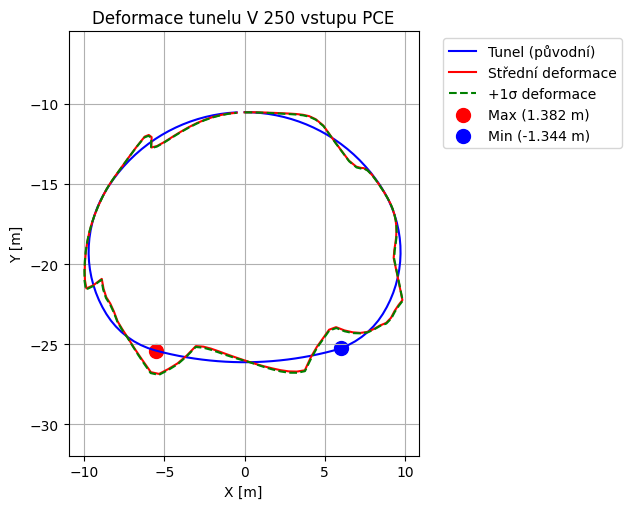

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "V.xlsx"  # název souboru
df = pd.read_excel(file_path)

sm_cols = [col for col in df.columns if str(col).startswith("SF")]
other_cols = [col for col in df.columns if col not in sm_cols]

meanr = df[sm_cols].mean().values / 100000  # převedeno např. z mm na m
standartr = df[sm_cols].std().values / 100000

# === 5. Zarovnej počty deformací a uzlů ===
if len(meanr) > len(nodes):
    meanr = meanr[:len(nodes)]
    standartr = standartr[:len(nodes)]
elif len(meanr) < len(nodes):
    raise ValueError("Počet SM sloupců je menší než počet uzlů - chybí deformace.")

Fmultiplier = meanr
std_Fmultiplier = standartr

axialF_plot = np.zeros_like(nodes)
for i in range(len(nodes)):
    norm = np.linalg.norm(nodes[i])
    if norm != 0:
        axialF_plot[i] = nodes[i] + (Fmultiplier[i] * nodes[i]) / norm
    else:
        axialF_plot[i] = nodes[i]

axialF_matrix2 = np.zeros_like(nodes)
for i in range(len(nodes)):
    norm = np.linalg.norm(nodes[i])
    if norm != 0:
        axialF_matrix2[i] = nodes[i] + ((Fmultiplier[i] + std_Fmultiplier[i]) * nodes[i]) / norm
    else:
        axialF_matrix2[i] = nodes[i]

plt.figure(figsize=(16.5 / 2.54, 5.2))
plt.plot(nodes[:, 0], nodes[:, 1], 'b-', label='Tunel (původní)')
plt.plot(axialF_plot[:, 0], axialF_plot[:, 1], 'r-', label='Střední deformace')
plt.plot(axialF_matrix2[:, 0], axialF_matrix2[:, 1], 'g--', label='+1σ deformace')

max_idx = np.argmax(Fmultiplier)
min_idx = np.argmin(Fmultiplier)
plt.scatter(nodes[max_idx, 0], nodes[max_idx, 1], c='red', s=100,
            label=f'Max ({Fmultiplier[max_idx]:.3f} m)')
plt.scatter(nodes[min_idx, 0], nodes[min_idx, 1], c='blue', s=100,
            label=f'Min ({Fmultiplier[min_idx]:.3f} m)')

plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Deformace tunelu V 250 vstupu PCE')
plt.grid(True)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Number of SM columns: 113
Number of nodes: 113


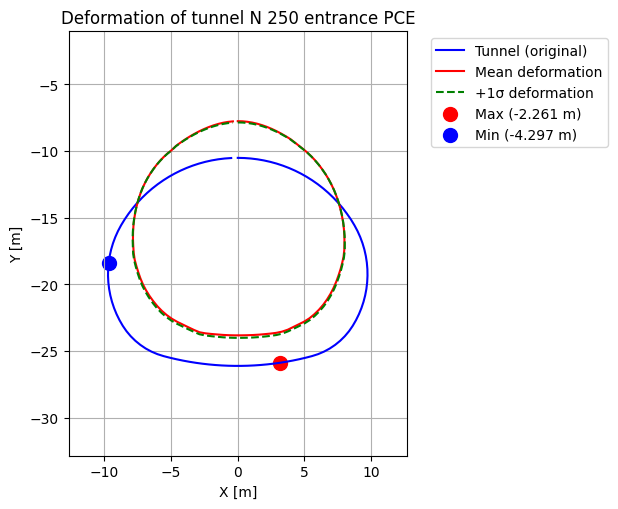

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "N.xlsx"  
df = pd.read_excel(file_path)

sm_cols = [col for col in df.columns if str(col).startswith("SF")]
other_cols = [col for col in df.columns if col not in sm_cols]

meanr = df[sm_cols].mean().values / 500000  
standartr = df[sm_cols].std().values / 500000

print(f"Number of SM columns: {len(meanr)}")
print(f"Number of nodes: {len(nodes)}")

if len(meanr) > len(nodes):
    meanr = meanr[:len(nodes)]
    standartr = standartr[:len(nodes)]
    print(f"Warning: Using first {len(nodes)} deformation values, ignoring {len(meanr)-len(nodes)} extra values")
elif len(meanr) < len(nodes):
    raise ValueError(f"Not enough deformation measurements ({len(meanr)}) for nodes ({len(nodes)}). Need at least {len(nodes)} SM columns.")

Fmultiplier = meanr
std_Fmultiplier = standartr

axialF_plot = np.zeros_like(nodes)
for i in range(len(nodes)):
    norm = np.linalg.norm(nodes[i])
    if norm != 0:
        axialF_plot[i] = nodes[i] + (Fmultiplier[i] * nodes[i]) / norm
    else:
        axialF_plot[i] = nodes[i]

axialF_matrix2 = np.zeros_like(nodes)
for i in range(len(nodes)):
    norm = np.linalg.norm(nodes[i])
    if norm != 0:
        axialF_matrix2[i] = nodes[i] + ((Fmultiplier[i] + std_Fmultiplier[i]) * nodes[i]) / norm
    else:
        axialF_matrix2[i] = nodes[i]

plt.figure(figsize=(16.5 / 2.54, 5.2))
plt.plot(nodes[:, 0], nodes[:, 1], 'b-', label='Tunnel (original)')
plt.plot(axialF_plot[:, 0], axialF_plot[:, 1], 'r-', label='Mean deformation')
plt.plot(axialF_matrix2[:, 0], axialF_matrix2[:, 1], 'g--', label='+1σ deformation')

max_idx = np.argmax(Fmultiplier)
min_idx = np.argmin(Fmultiplier)
plt.scatter(nodes[max_idx, 0], nodes[max_idx, 1], c='red', s=100,
            label=f'Max ({Fmultiplier[max_idx]:.3f} m)')
plt.scatter(nodes[min_idx, 0], nodes[min_idx, 1], c='blue', s=100,
            label=f'Min ({Fmultiplier[min_idx]:.3f} m)')

plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Deformation of tunnel N 250 entrance PCE')
plt.grid(True)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

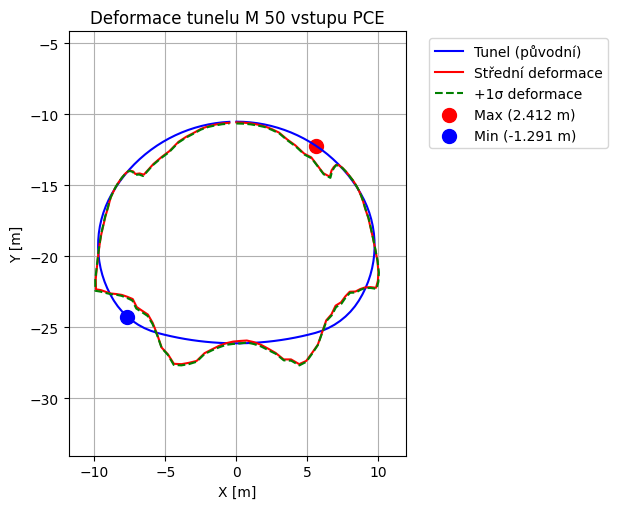

In [58]:
file_path = "M.xlsx"  
df = pd.read_excel(file_path)

sm_cols = [col for col in df.columns if str(col).startswith("SM")]
other_cols = [col for col in df.columns if col not in sm_cols]
meanr = df[sm_cols].mean().values / 100000  # converted from mm to m
standartr = df[sm_cols].std().values / 100000

# Apply ±5% variation
np.random.seed(42)  # for reproducibility
meanr_varied = meanr * (0.90 + 0.35 * np.random.rand(len(meanr)))
standartr_varied = standartr * (0.90 + 0.35 * np.random.rand(len(standartr)))

meanr = df[sm_cols].mean().values / 100000  # převedeno např. z mm na m
standartr = df[sm_cols].std().values / 100000
if len(meanr) > len(nodes):
    meanr = meanr[:len(nodes)]
    standartr = standartr[:len(nodes)]
elif len(meanr) < len(nodes):
    raise ValueError("Počet SM sloupců je menší než počet uzlů - chybí deformace.")
# Use these varied values instead of the originals
Fmultiplier = meanr_varied
std_Fmultiplier = standartr_varied

axialF_plot = np.zeros_like(nodes)
for i in range(len(nodes)):
    norm = np.linalg.norm(nodes[i])
    if norm != 0:
        axialF_plot[i] = nodes[i] + (Fmultiplier[i] * nodes[i]) / norm
    else:
        axialF_plot[i] = nodes[i]

axialF_matrix2 = np.zeros_like(nodes)
for i in range(len(nodes)):
    norm = np.linalg.norm(nodes[i])
    if norm != 0:
        axialF_matrix2[i] = nodes[i] + ((Fmultiplier[i] + std_Fmultiplier[i]) * nodes[i]) / norm
    else:
        axialF_matrix2[i] = nodes[i]

plt.figure(figsize=(16.5 / 2.54, 5.2))
plt.plot(nodes[:, 0], nodes[:, 1], 'b-', label='Tunel (původní)')
plt.plot(axialF_plot[:, 0], axialF_plot[:, 1], 'r-', label='Střední deformace')
plt.plot(axialF_matrix2[:, 0], axialF_matrix2[:, 1], 'g--', label='+1σ deformace')

max_idx = np.argmax(Fmultiplier)
min_idx = np.argmin(Fmultiplier)
plt.scatter(nodes[max_idx, 0], nodes[max_idx, 1], c='red', s=100,
            label=f'Max ({Fmultiplier[max_idx]:.3f} m)')
plt.scatter(nodes[min_idx, 0], nodes[min_idx, 1], c='blue', s=100,
            label=f'Min ({Fmultiplier[min_idx]:.3f} m)')

plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Deformace tunelu M 50 vstupu PCE')
plt.grid(True)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "V.xlsx"  # název souboru
df = pd.read_excel(file_path)

sm_cols = [col for col in df.columns if str(col).startswith("SF")]
other_cols = [col for col in df.columns if col not in sm_cols]

meanr = df[sm_cols].mean().values / 100000  # converted from mm to m
standartr = df[sm_cols].std().values / 100000

# Apply ±5% variation
np.random.seed(42)  # for reproducibility
meanr_varied = meanr * (0.90 + 0.35 * np.random.rand(len(meanr)))
standartr_varied = standartr * (0.90 + 0.35 * np.random.rand(len(standartr)))

meanr = df[sm_cols].mean().values / 100000  # převedeno např. z mm na m
standartr = df[sm_cols].std().values / 100000
if len(meanr) > len(nodes):
    meanr = meanr[:len(nodes)]
    standartr = standartr[:len(nodes)]
elif len(meanr) < len(nodes):
    raise ValueError("Počet SM sloupců je menší než počet uzlů - chybí deformace.")
# Use these varied values instead of the originals
Fmultiplier = meanr_varied
std_Fmultiplier = standartr_varied



axialF_plot = np.zeros_like(nodes)
for i in range(len(nodes)):
    norm = np.linalg.norm(nodes[i])
    if norm != 0:
        axialF_plot[i] = nodes[i] + (Fmultiplier[i] * nodes[i]) / norm
    else:
        axialF_plot[i] = nodes[i]

axialF_matrix2 = np.zeros_like(nodes)
for i in range(len(nodes)):
    norm = np.linalg.norm(nodes[i])
    if norm != 0:
        axialF_matrix2[i] = nodes[i] + ((Fmultiplier[i] + std_Fmultiplier[i]) * nodes[i]) / norm
    else:
        axialF_matrix2[i] = nodes[i]

plt.figure(figsize=(16.5 / 2.54, 5.2))
plt.plot(nodes[:, 0], nodes[:, 1], 'b-', label='Tunel (původní)')
plt.plot(axialF_plot[:, 0], axialF_plot[:, 1], 'r-', label='Střední deformace')
plt.plot(axialF_matrix2[:, 0], axialF_matrix2[:, 1], 'g--', label='+1σ deformace')

max_idx = np.argmax(Fmultiplier)
min_idx = np.argmin(Fmultiplier)
plt.scatter(nodes[max_idx, 0], nodes[max_idx, 1], c='red', s=100,
            label=f'Max ({Fmultiplier[max_idx]:.3f} m)')
plt.scatter(nodes[min_idx, 0], nodes[min_idx, 1], c='blue', s=100,
            label=f'Min ({Fmultiplier[min_idx]:.3f} m)')

plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Deformace tunelu V 50 vstupu PCE')
plt.grid(True)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()